# Results experiments data effieciency

In [4]:
import os
import sys
import time
sys.path.extend(['..'])

import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [5]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{amssymb}')

In [6]:
res_path = '../../results/data_eff'

ece_file = 'data_eff_ECE_reg_{}.csv'
nll_file = 'data_eff_NLL_reg_{}.csv'
bri_file = 'data_eff_BRI_reg_{}.csv'

In [14]:
ECEs = [pd.read_csv(os.path.join(res_path, ece_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Model', 'N']) for i in range(10)]
NLLs = [pd.read_csv(os.path.join(res_path, nll_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Model', 'N']) for i in range(10)]
Bris = [pd.read_csv(os.path.join(res_path, bri_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Model', 'N']) for i in range(10)]

In [15]:
ECE = sum(ECEs)/len(ECEs)
NLL = sum(NLLs)/len(NLLs)
Bri = sum(Bris)/len(Bris)

In [33]:
color_palette_J = {
                     'black': '#000000',
                     'orange': '#E69F00',
                     'blue': '#56B4E9',
                     'green': '#009E73',
                     'orange': '#F0E442',
                     'dark_blue': '#0072B2',
                     'dark_orange': '#D55E00',
                     'pink': '#CC79A7',
                     'white': '#111111',
                     'grey': 'grey'
                   }

In [39]:
models = ['TS', 'ETS', 'MIR', 'BTS', 'HTS', 'LTS', 'HnLTS', 'PTS', 'PTS_ece']
labels = ['TS', 'ETS', 'MIR', 'BTS', 'HTS', 'LTS', 'HnLTS', 'PTS', 'PTS (ece)']

In [35]:
colors = [color_palette_J['orange'], color_palette_J['green'], 'y', color_palette_J['pink'], 'aquamarine', 'lightseagreen', 'teal', 'midnightblue', color_palette_J['dark_orange']]

## ECE Graphics

In [30]:
curr = ECE.loc["densenet-121"]
Ns = curr.index.values

uncal = curr.loc[Ns[0], 'Uncalibrated']

eces = [curr[model].values for model in models]

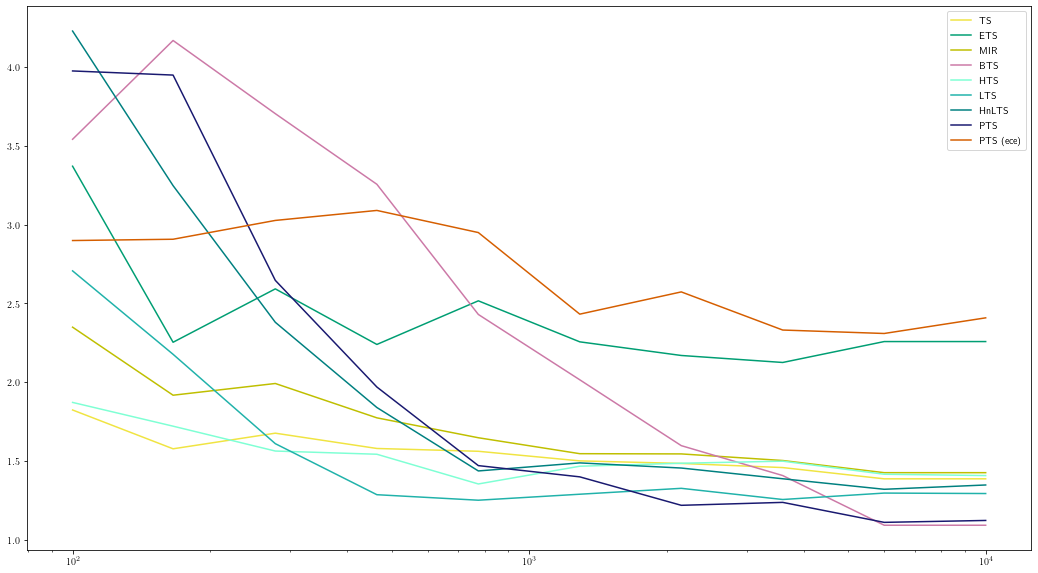

In [41]:
fig, ax = plt.subplots(figsize=(18, 10))

for i, (label, color) in enumerate(zip(labels, colors)):
    ax.plot(Ns, eces[i], c=color, label=label)

ax.set_xscale('log')
ax.legend()

plt.show()